In [4]:
import pycosat
import sys, getopt 
import timeit
import itertools
import datetime
from pprint import pprint
import math 
import matplotlib.pyplot as plt


In [5]:
nonreturners=[]
time_array=[]
size_rows=0
size_columns=0

In [6]:
def main(): 
    solve_problem(grid)
      

In [7]:

def solve_problem(problemset):
    size_rows=int(len(problemset))
    size_columns=int(len(problemset[0]))
    max_value=size_rows
    print(size_rows, size_columns,max_value)
    
    print('Problem:') 
    pprint(problemset)
    solve(problemset, size_rows,size_columns,max_value) 
    print('Answer:')
    pprint(problemset)  

In [8]:
def v(i, j, d,rows,columns,max_value): 
    return rows*columns * (i - 1) + max_value * (j - 1) + d

In [9]:
#Reduces Sudoku problem to a SAT clauses  --> in general all the options
def sudoku_clauses(rows,columns,max_value): 
    res = []
    # for all cells, ensure that the each cell:
    for i in range(1, rows+1):
        for j in range(1, columns+1):
            # denotes (at least) one of the 9 digits (1 clause)
            res.append([v(i, j, d,rows,columns,max_value) for d in range(1, max_value+1)])
            # does not denote two different digits at once (36 clauses)
            for d in range(1, max_value+1):
                for dp in range(d + 1, max_value+1):
                    res.append([-v(i, j, d,rows,columns,max_value), -v(i, j, dp,rows,columns,max_value)])
    def valid(cells): 
        for i, xi in enumerate(cells):
            for j, xj in enumerate(cells):
                if i < j:
                    for d in range(1, max_value+1):
                        res.append([-v(xi[0], xi[1], d,rows,columns,max_value), -v(xj[0], xj[1], d,rows,columns,max_value)])

    # ensure rows and columns have distinct values
    for i in range(1, rows+1):
        valid([(i, j) for j in range(1, rows+1)])
        valid([(j, i) for j in range(1, columns+1)])
        
#     # ensure nxn sub-grids "regions" have distinct values 
#     squr_of_rows= int(math.sqrt(rows))
#     squr_of_columns= int(math.sqrt(columns))
#     #print("those are the sqrt:{},{}".format(squr_of_rows,squr_of_columns) )
#     for i in range(1,rows,squr_of_rows):
#         for j in (1,columns,squr_of_columns):
#             #print(i,j)
#             valid([(i + k % squr_of_rows, j + k // squr_of_columns) for k in range(max_value)])
      
    #all grid, in region/ 
    #assert len(res) == (rows*columns) * (1 + 36) + 27 * 324
    #print(res)
    return res

In [10]:
# def solve(grid,rows,columns,max_value):
#     #solve a Sudoku problem
    
#     clauses = sudoku_clauses(rows,columns,max_value) #--> in general all the clauses
#     #clauses = sudoku_clauses()
#     for i in range(1,rows+1 ):
#         for j in range(1, columns+1):
            
#             d = (grid[i - 1][j - 1])
#             # For each digit already known, a clause (with one literal). 
#             if d:
#                 clauses.append([v(i, j, d,rows,columns,max_value)])

    
       
#     # Print number SAT clause  
#     numclause = len(clauses)
#     print ("P CNF " + str(numclause) +"(number of clauses)")
    
# #     for inner_list in clauses:
# #         print("inner" ,type(inner_list))
#     #print(clauses)
    
#     def read_cell(i, j,sol):
#     # return the digit of cell i, j according to the solution  ##here i can add the calling couple of times
#         for d in range(1, max_value+1):
#             if v(i, j, d,rows,columns,max_value) in sol:
#                 return d
    
#     i=0
#     all_solutions=list((pycosat.itersolve(clauses)))
    
#     with open("generalized_solutions.txt", "w") as att_file:
#         for sol2 in all_solutions:
#             #print (sol2)

#             start =timeit.timeit()

#             sol = sol2#set(pycosat.solve(clauses))#set(sol2)
#             print(i)
#             ++i
#             for i in range(1, rows+1):
#                 for j in range(1, columns+1):
#                     grid[i - 1][j - 1] = read_cell(i, j,sol)
          
#             end =timeit.timeit()

#             #print("Time: "+str((end - start)))
#             time_array.append(abs(round((end - start),5)))

 

#             att_file.write(str((grid))+"\n" +"\n")

#         pprint(grid)

In [13]:
def solve(grid,rows,columns,max_value):
    #solve a Sudoku problem
    
    clauses = sudoku_clauses(rows,columns,max_value) #--> in general all the clauses
    #clauses = sudoku_clauses()
    for i in range(1,rows+1 ):
        for j in range(1, columns+1):
            
            d = (grid[i - 1][j - 1])
            # For each digit already known, a clause (with one literal). 
            if d:
                clauses.append([v(i, j, d,rows,columns,max_value)])

    
       
    # Print number SAT clause  
    numclause = len(clauses)
    print ("P CNF " + str(numclause) +"(number of clauses)")
    
#     for inner_list in clauses:
#         print("inner" ,type(inner_list))
    #print(clauses)
    
    def read_cell(i, j,sol):
    # return the digit of cell i, j according to the solution  ##here i can add the calling couple of times
        for d in range(1, max_value+1):
            if v(i, j, d,rows,columns,max_value) in sol:
                return d
    
    i=0
#     all_solutions=list((pycosat.itersolve(clauses)))
    
#     with open("generalized_solutions.txt", "w") as att_file:
#         for sol2 in all_solutions:
#             #print (sol2)

    start =timeit.timeit()

    sol = set(pycosat.solve(clauses))#set(sol2)
#             print(i)
#             ++i
    for i in range(1, rows+1):
        for j in range(1, columns+1):
            grid[i - 1][j - 1] = read_cell(i, j,sol)

    end =timeit.timeit()

    #print("Time: "+str((end - start)))
    time_array.append(abs(round((end - start),5)))

 


    pprint(grid)

In [14]:
#  grid_easy = [[0, 0, 0, 1, 0, 9, 4, 2, 7],
#             [1, 0, 9, 8, 0, 0, 0, 0, 6],
#             [0, 0, 7, 0, 5, 0, 1, 0, 8],
#             [0, 5, 6, 0, 0, 0, 0, 8, 2],
#             [0, 0, 0, 0, 2, 0, 0, 0, 0],
#             [9, 4, 0, 0, 0, 0, 6, 1, 0],
#             [7, 0, 4, 0, 6, 0, 9, 0, 0],
#             [6, 0, 0, 0, 0, 8, 2, 0, 5],
#             [2, 9, 5, 3, 0, 1, 0, 0, 0]]
    
grid_easy_blank = [[0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0]]
    
grid=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

grid_huge=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]



In [15]:
main()

16 16 16
Problem:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
P CNF 92416(number of clauses)
[[16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [15, 16, 13, 14, 11, 12, 9, 10, 7, 8, 5, 6, 3, 4, 1, 2],
 [14, 13, 16, 15, 1

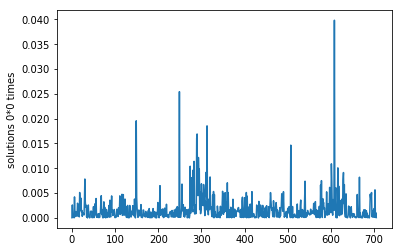

In [10]:
#to run the psycosat to get all solutions and save time in array to plot it
plt.plot(time_array)
plt.ylabel('solutions {}*{} times'.format(size_rows,size_columns))
plt.show()

In [11]:
time_array #https://matplotlib.org/tutorials/introductory/pyplot.html

[4e-05,
 0.00261,
 0.00018,
 0.00027,
 0.00052,
 2e-05,
 0.00423,
 0.00083,
 0.00028,
 0.00128,
 0.00122,
 0.00043,
 0.00034,
 0.00296,
 0.00255,
 0.00046,
 0.00075,
 0.00021,
 0.00512,
 0.00289,
 0.00154,
 0.00398,
 0.0012,
 0.00151,
 0.00032,
 0.00102,
 0.00091,
 0.00084,
 0.00059,
 0.00332,
 0.00784,
 0.00324,
 0.00215,
 0.00255,
 0.00021,
 0.00072,
 0.0,
 0.00156,
 0.0026,
 0.00036,
 0.00026,
 1e-05,
 0.00015,
 0.00133,
 0.00132,
 0.00136,
 0.00126,
 3e-05,
 0.00079,
 0.00112,
 0.00227,
 5e-05,
 0.00041,
 0.00282,
 0.00061,
 0.00243,
 0.00391,
 0.00018,
 0.00043,
 0.00011,
 0.0003,
 0.00085,
 7e-05,
 0.00086,
 9e-05,
 0.00087,
 0.00105,
 0.00323,
 0.00448,
 0.00067,
 0.00169,
 0.00019,
 0.0,
 0.00073,
 0.00324,
 0.00014,
 0.00215,
 0.00016,
 3e-05,
 0.00048,
 0.0017,
 8e-05,
 0.00098,
 0.00014,
 0.00102,
 0.00154,
 0.00252,
 0.00016,
 0.00357,
 0.00039,
 0.00021,
 0.00206,
 0.00443,
 0.00115,
 0.00153,
 0.00048,
 0.00101,
 0.00088,
 0.00169,
 0.00094,
 5e-05,
 0.00028,
 0.00011,
 0